In [2]:
import numpy as np, matplotlib.pyplot as plt

### Load data

In [42]:
fname = 'Z:/behavior/4-9-19-a/croprot/a_2019-04-09-164951_dlc.npy'
fnameAbs = 'Z:/behavior/4-9-19-a/croprot/a_2019-04-09-164951_dlc_abs.npy'

In [16]:
arr = np.memmap(fname, dtype=np.float32, mode='r')
N = arr.size // (3 * 26)
arr = np.memmap(fname, dtype=np.float32, mode='r', shape=(N, 3, 26))
arr.shape

(1214200, 3, 26)

In [56]:
arrCent = arr[:,0:2,:] - np.nanmean(arr[:, 0:2, [0,1]], axis=2)[:,:,np.newaxis]

In [43]:
arrAbs = np.memmap(fnameAbs, dtype=np.float32, mode='r', shape=(N, 3, 26))
arrAbs.shape

(1214200, 3, 26)

In [48]:
xy = np.nanmean(arrAbs[:, 0:2, [0,1]], axis=2)
xy.shape

C:\Users\acorver\.conda\envs\spider\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


(1214200, 2)

### Plot example limb trajectories

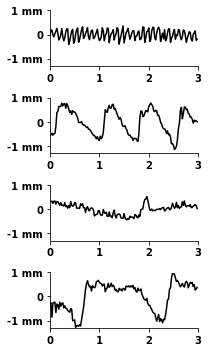

In [225]:
exExtrudeFast = (850000, 25)
exWalk = (684100, 22)
exLegSweep1 = (861450, 22)
exLegSweep2 = (615920, 22)

dur = 150
PIXEL_TO_MM = 100 / 1024

fig, ax = plt.subplots(4, 1, figsize=(3,5))

arrCentSS = np.mean(arrCent[S:(S+dur), :, [0,1]], axis=2)

S, L = exExtrudeFast
ts = np.linalg.norm(arrCent[S:(S+dur), :, L] - arrCentSS, axis=1)
ax[0].plot((ts - np.mean(ts))*PIXEL_TO_MM, color='#000000')

S, L = exWalk
ts = np.linalg.norm(arrCent[S:(S+dur), :, L] - arrCentSS, axis=1)
ax[1].plot((ts - np.mean(ts))*PIXEL_TO_MM, color='#000000')

S, L = exLegSweep1
ts = np.linalg.norm(arrCent[S:(S+dur), :, L] - arrCentSS, axis=1)
ax[2].plot((ts - np.mean(ts))*PIXEL_TO_MM, color='#000000')

S, L = exLegSweep2
ts = np.linalg.norm(arrCent[S:(S+dur), :, L] - arrCentSS, axis=1)
ax[3].plot((ts - np.mean(ts))*PIXEL_TO_MM, color='#000000')

for k in range(4):
    ax[k].set_xlim(0, 3)
    ax[k].set_xticks([0, 50, 100, 150])
    ax[k].set_xticklabels([0, 1, 2, 3])
    ax[k].set_ylim(-1.3, 1)
    ax[k].set_yticks([-1, 0, 1])
    ax[k].set_yticklabels(['-1 mm', '0', '1 mm'])
    ax[k].spines["top"].set_visible(False)
    ax[k].spines["right"].set_visible(False)
    
fig.tight_layout()
fig.savefig('C:/Users/acorver/Desktop/paper-figures/Fig_Suppl_2c.pdf')